In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

In [3]:
# Loading dataset
df=pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age: the age of the patient in years.

sex: the sex of the patient (1 = male, 0 = female).

cp: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

trestbps: the resting blood pressure of the patient in mm Hg.

chol: the serum cholesterol level of the patient in mg/dl.

fbs: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

restecg: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

thalach: the maximum heart rate achieved by the patient during exercise. exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

oldpeak: the ST depression induced by exercise relative to rest. slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

ca: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

thal: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df['oldpeak'].value_counts()

oldpeak
0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: count, dtype: int64

In [6]:
df.isnull().values.any()

False

In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [10]:
    # Check how many patients have reversible defect in thal column
df[df['thal']==2].shape[0]

166

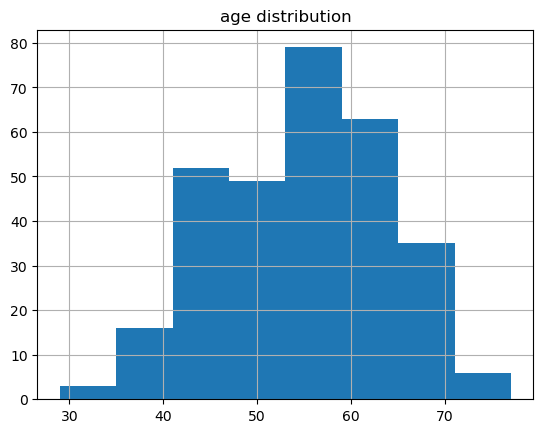

In [11]:
df['age'].hist(grid=True,bins=8)
plt.title("age distribution count")
plt.show()

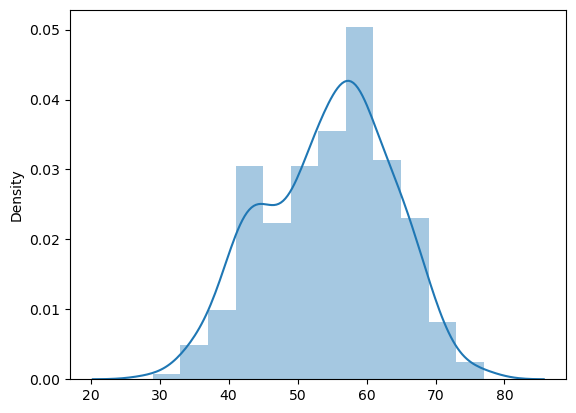

In [13]:
sns.distplot(x=df['age'],kde=True)
plt.show()

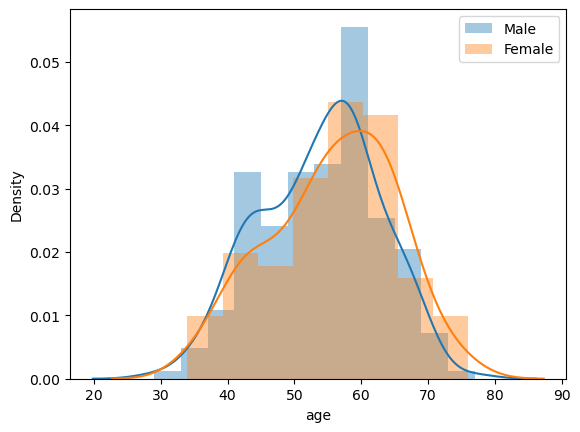

In [15]:
sns.distplot(df[df['sex']==1]['age'],label='Male')
sns.distplot(df[df['sex']==0]['age'],label='Female')
plt.legend()
plt.show()

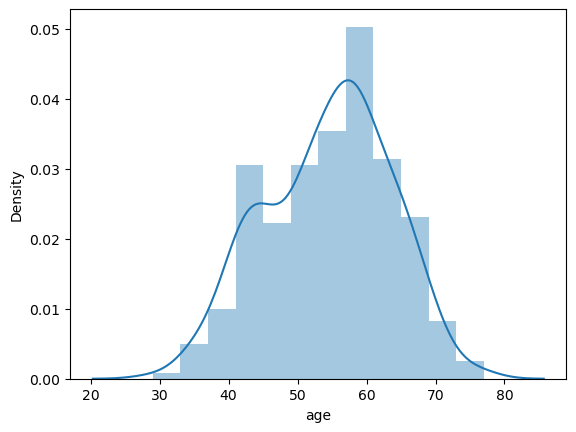

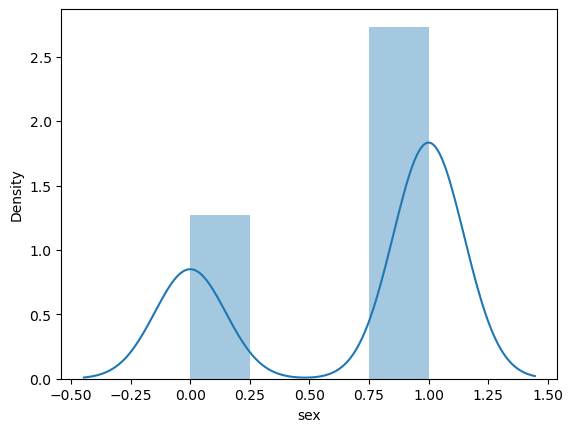

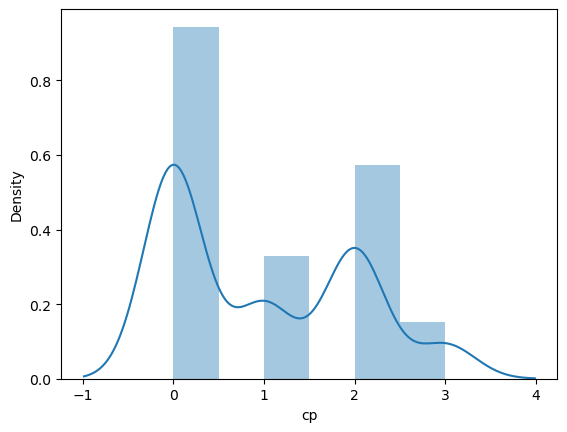

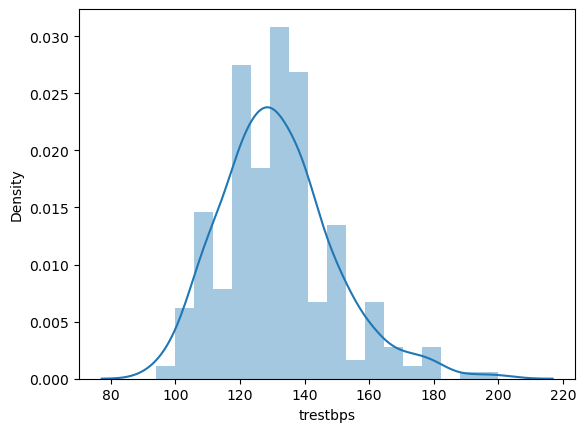

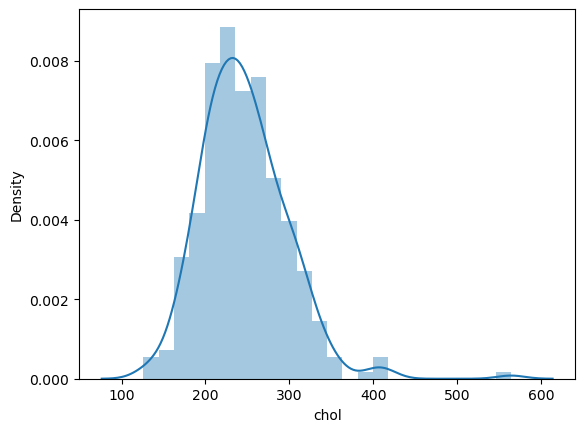

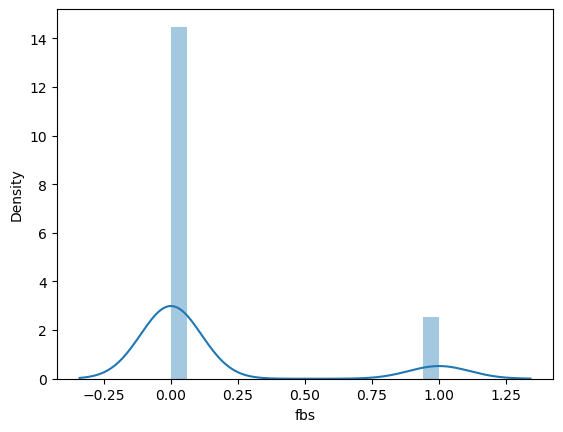

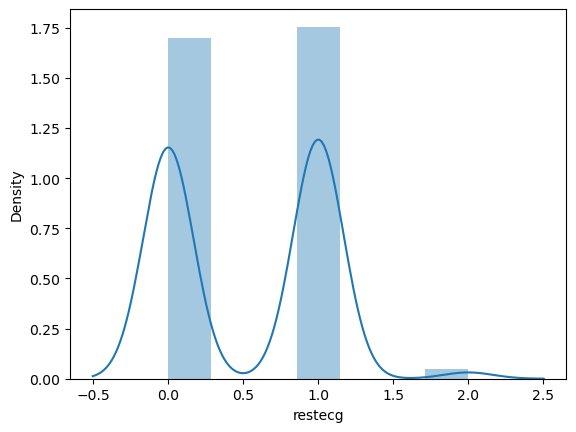

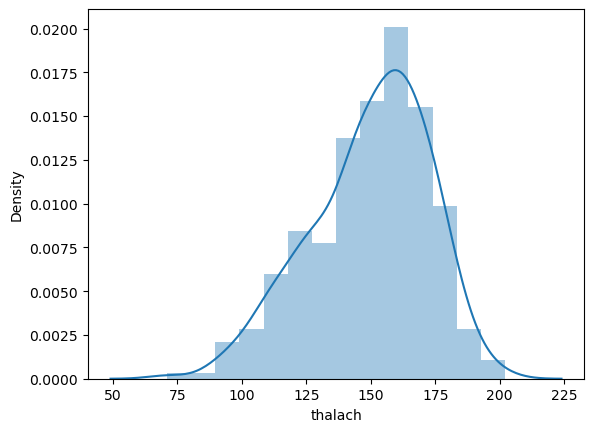

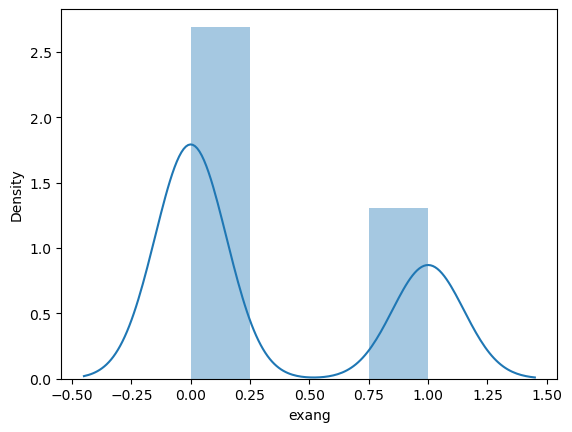

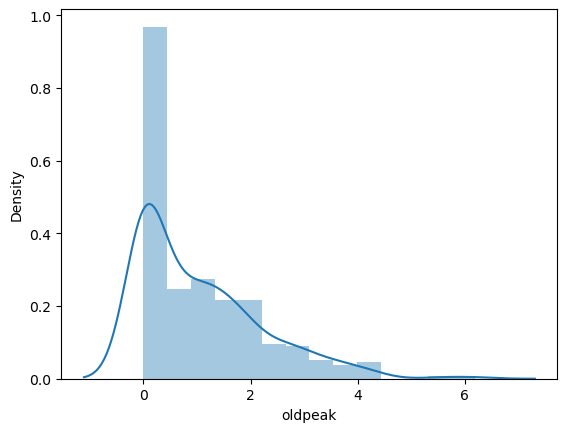

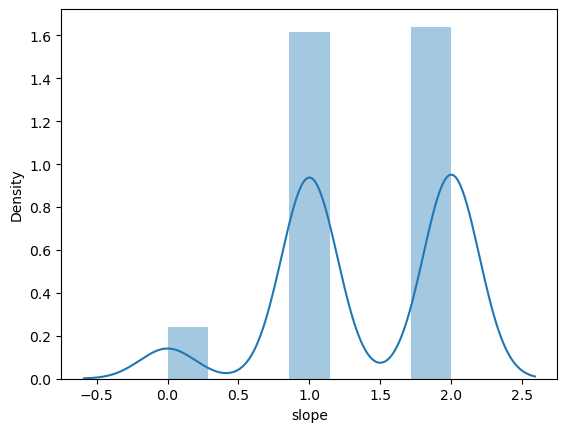

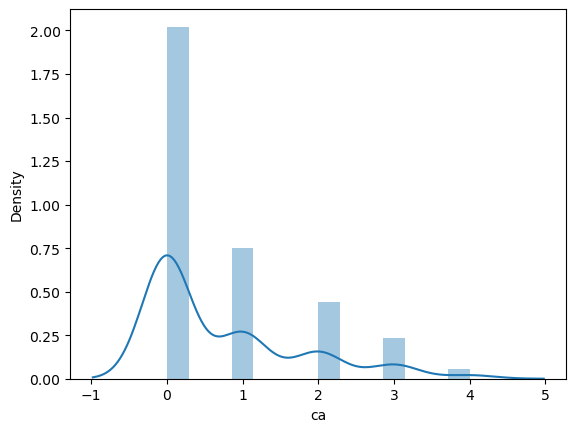

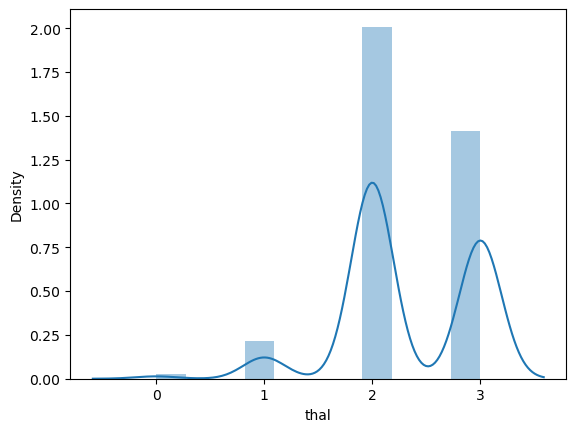

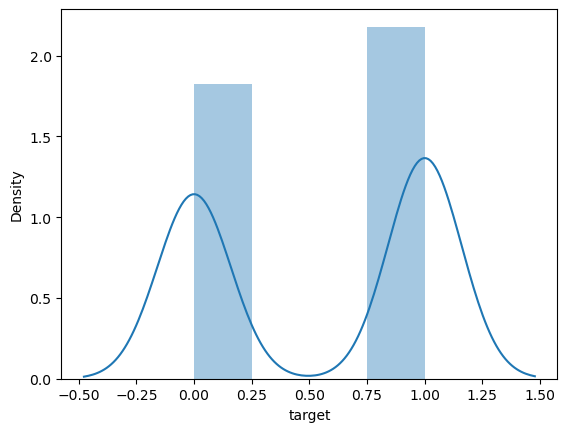

In [16]:
for col in df.columns:
    if df[col].dtypes=='int64' or df[col].dtypes=='float64':
        sns.distplot(df[col])
        plt.xlabel(col)
        plt.show()

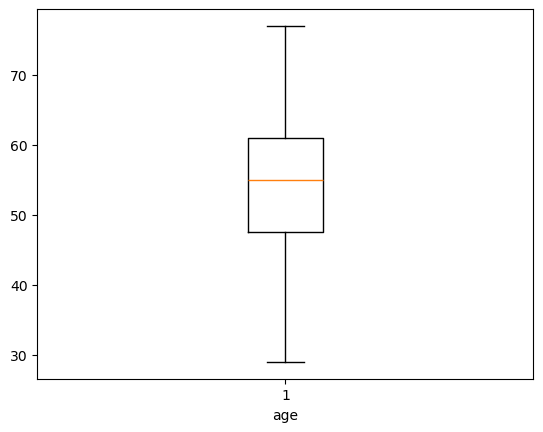

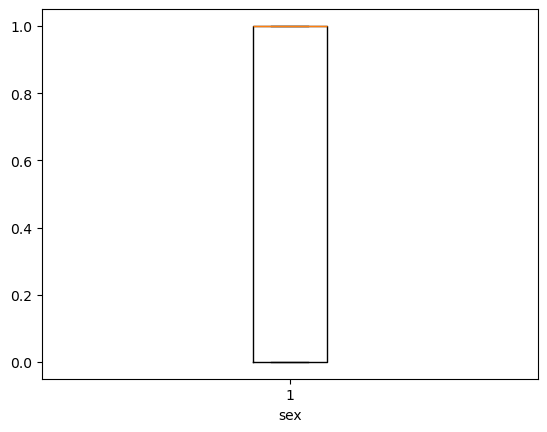

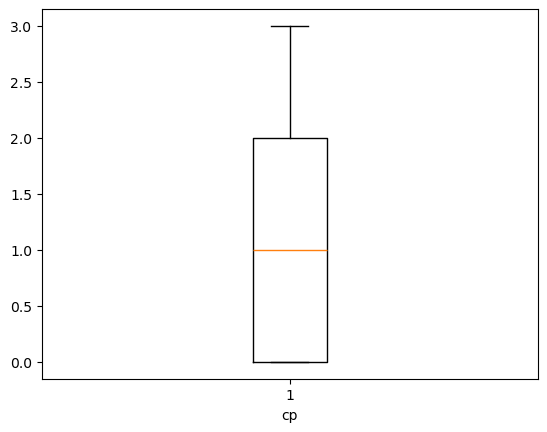

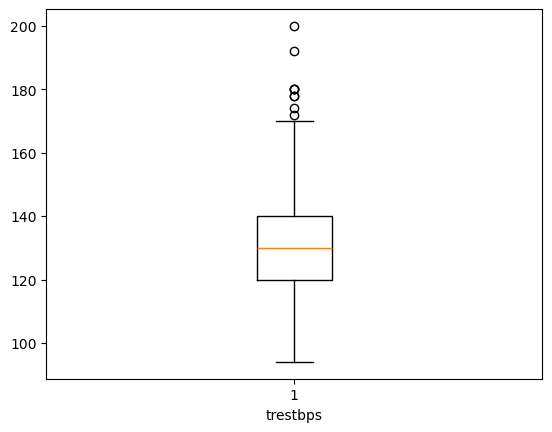

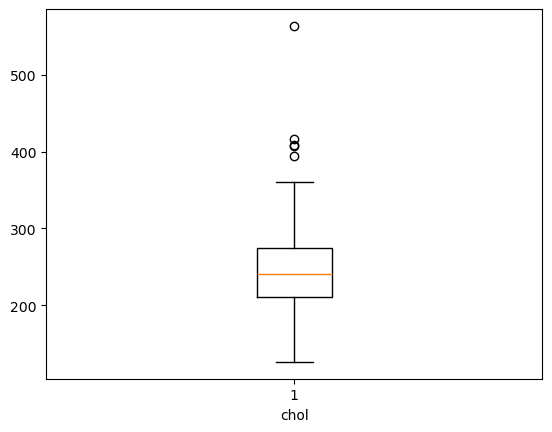

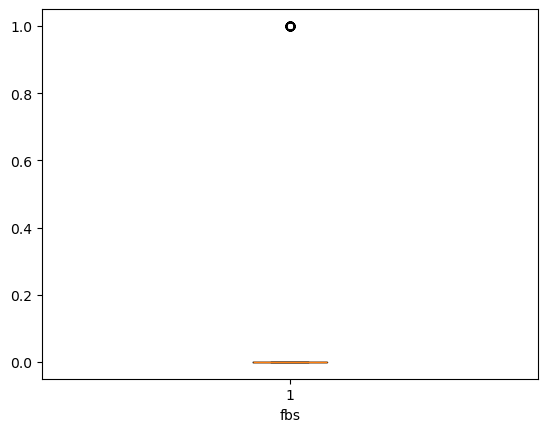

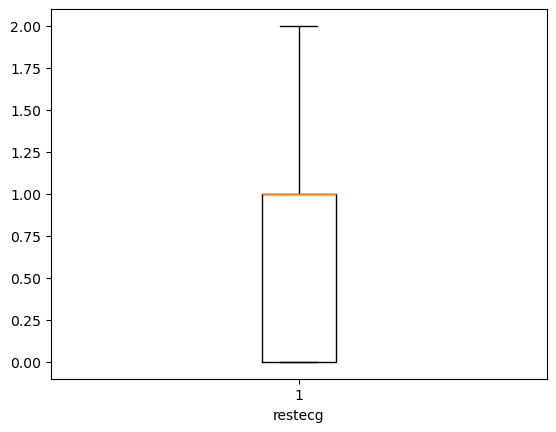

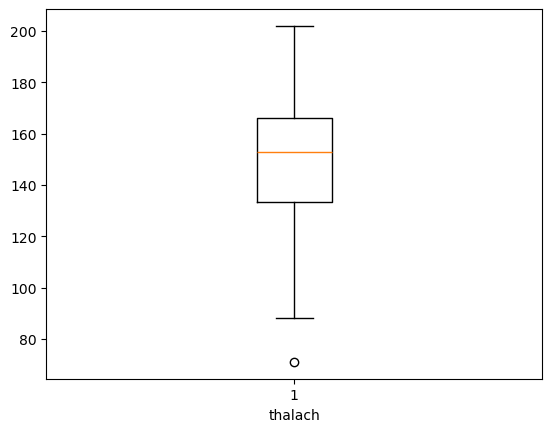

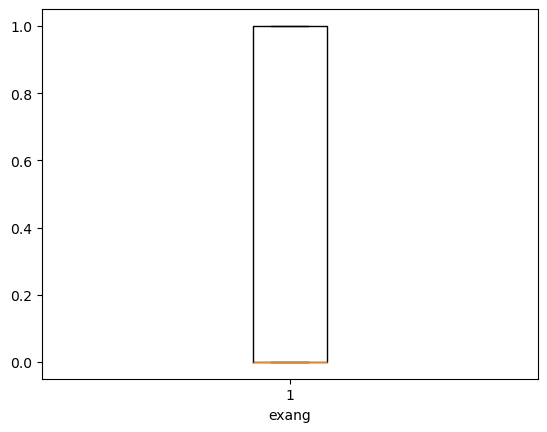

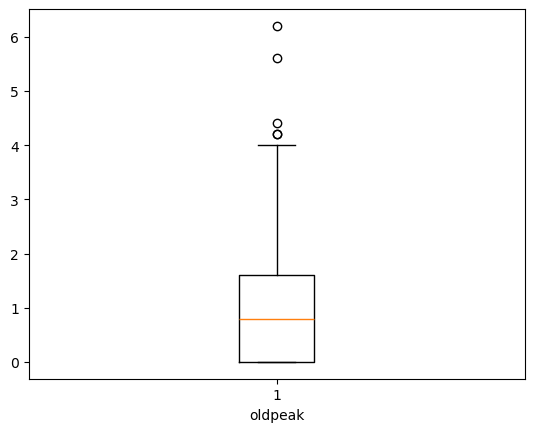

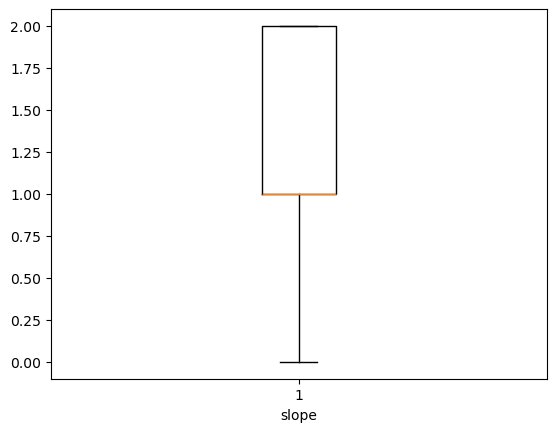

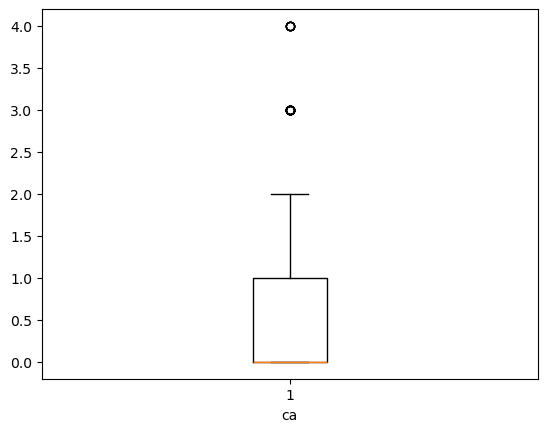

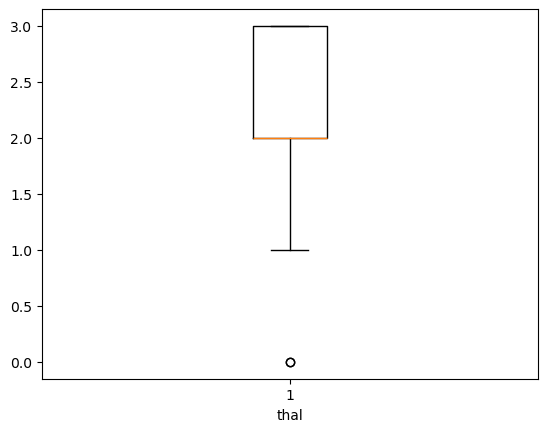

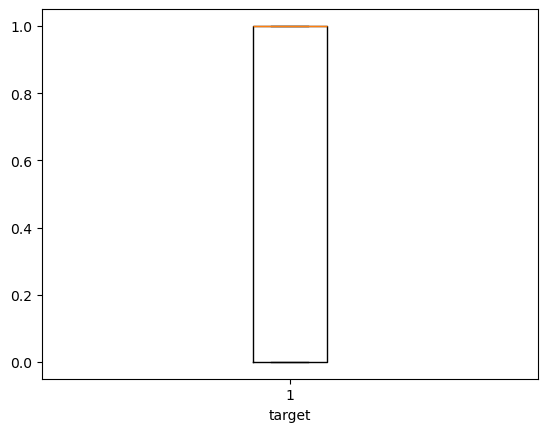

In [17]:
for col in df.columns:
    if df[col].dtypes=='int64' or df[col].dtypes=='float64':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [8]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [9]:
df.shape

(228, 14)

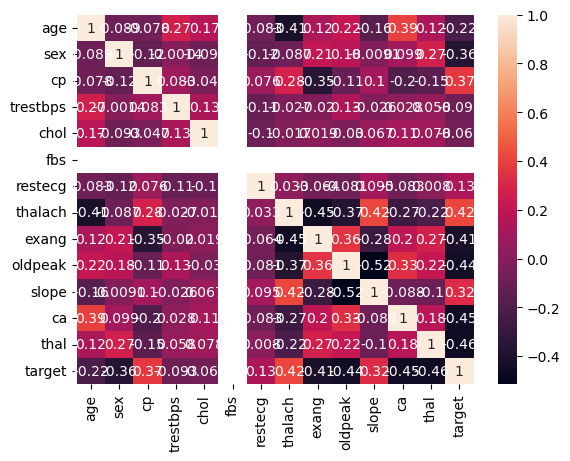

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Multicollinearity Check

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if (df[col].dtypes!='object') & (col!='target'):
        col_list.append(col)
x=df[col_list]
VIF=pd.DataFrame()
VIF['Features']=x.columns
VIF['vif_score']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,vif_score
0,age,41.835111
1,sex,3.632646
2,cp,2.245553
3,trestbps,71.089557
4,chol,31.836140
5,fbs,NaN
6,restecg,2.194363
7,thalach,44.642766
8,exang,2.080511
9,oldpeak,3.122842


In [28]:
df1=df.copy()
df1.drop(['trestbps'],axis=1,inplace=True)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df1.columns:
    if (df1[col].dtypes!='object') & (col!='target'):
        col_list.append(col)
x=df1[col_list]
VIF=pd.DataFrame()
VIF['Features']=x.columns
VIF['vif_score']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,vif_score
0,age,30.264913
1,sex,3.614435
2,cp,2.235045
3,chol,30.685858
4,fbs,NaN
5,restecg,2.192863
6,thalach,35.691499
7,exang,2.074734
8,oldpeak,3.024381
9,slope,11.119967


In [32]:
df1.drop(['thalach'],axis=1,inplace=True)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df1.columns:
    if (df1[col].dtypes!='object') & (col!='target'):
        col_list.append(col)
x=df1[col_list]
VIF=pd.DataFrame()
VIF['Features']=x.columns
VIF['vif_score']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,vif_score
0,age,28.590553
1,sex,3.563741
2,cp,2.142158
3,chol,26.026510
4,fbs,NaN
5,restecg,2.176142
6,exang,2.008126
7,oldpeak,3.003020
8,slope,9.101351
9,ca,1.852315


In [34]:
df1.drop(['age'],axis=1,inplace=True)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df1.columns:
    if (df1[col].dtypes!='object') & (col!='target'):
        col_list.append(col)
x=df1[col_list]
VIF=pd.DataFrame()
VIF['Features']=x.columns
VIF['vif_score']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,vif_score
0,sex,3.550764
1,cp,2.107834
2,chol,17.610314
3,fbs,NaN
4,restecg,2.167454
5,exang,2.005475
6,oldpeak,2.905494
7,slope,8.885387
8,ca,1.751875
9,thal,17.687940


In [36]:
df1.drop(['thal'],axis=1,inplace=True)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df1.columns:
    if (df1[col].dtypes!='object') & (col!='target'):
        col_list.append(col)
x=df1[col_list]
VIF=pd.DataFrame()
VIF['Features']=x.columns
VIF['vif_score']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,vif_score
0,sex,3.213870
1,cp,2.104076
2,chol,11.544412
3,fbs,NaN
4,restecg,2.104914
5,exang,1.937149
6,oldpeak,2.785999
7,slope,8.603831
8,ca,1.748696


In [41]:
df1.drop(columns=['chol','fbs'],axis=1,inplace=True)

KeyError: "['chol'] not found in axis"

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df1.columns:
    if (df1[col].dtypes!='object') & (col!='target'):
        col_list.append(col)
x=df1[col_list]
VIF=pd.DataFrame()
VIF['Features']=x.columns
VIF['vif_score']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,vif_score
0,sex,3.164435
1,cp,2.005602
2,fbs,NaN
3,restecg,2.070916
4,exang,1.850736
5,oldpeak,2.406925
6,slope,4.121314
7,ca,1.730380


In [43]:
df1.drop(['fbs'],axis=1,inplace=True)

In [44]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [49]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
log_r.fit(x_train,y_train)
y_pred=log_r.predict(x_test)
print("accuracy: ",accuracy_score(y_pred,y_test))
print("Precision: ",precision_score(y_pred,y_test))
print("Recall :",recall_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))

accuracy:  0.7681159420289855
Precision:  0.8292682926829268
Recall : 0.7906976744186046
F1 Score : 0.8095238095238095


In [19]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=7)
scoring='accuracy'

In [21]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('XGB',xgb.XGBClassifier()))

#Evaluating each model in turn
results=[]
names=[]
from sklearn import model_selection
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,shuffle=True)
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s %f (%f)' % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR 0.798790 (0.057749)
DT 0.754032 (0.080491)
RF 0.836895 (0.040460)
LDA 0.786089 (0.084930)
KNN 0.635282 (0.080130)
NB 0.805040 (0.012124)
SVM 0.560282 (0.055852)
XGB 0.804637 (0.051883)


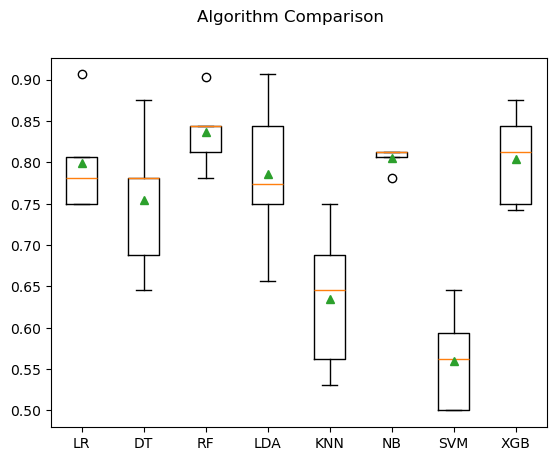

In [24]:
fig=plt.figure()
plt.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results,showmeans=True)
ax.set_xticklabels(names)
plt.show()

Here we see Random Forest as the best fit model

In [28]:
# Feature Selection by Feature importance in random forest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
data=pd.DataFrame(columns=['Features','Feature_score'])
data['Features']=x.columns
data['Feature_score']=rfc.feature_importances_
data.nlargest(12,columns='Feature_score')

,Features,Feature_score
7,thalach,0.178851
12,thal,0.130559
11,ca,0.114244
0,age,0.104078
4,chol,0.080469
3,trestbps,0.080419
9,oldpeak,0.078992
2,cp,0.073960
8,exang,0.058199
1,sex,0.049602


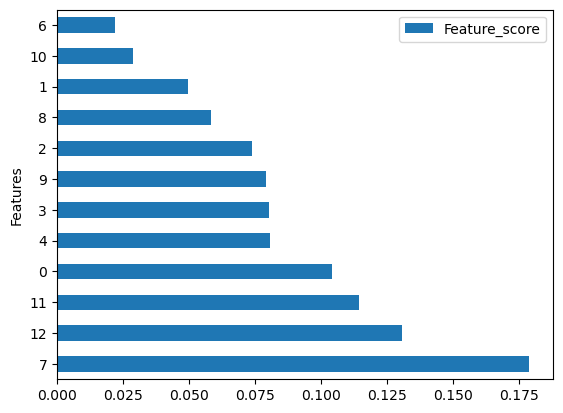

In [30]:
data.nlargest(12,columns='Feature_score').plot(kind='barh')
plt.ylabel('Features')
plt.show()

In [31]:
x.drop(columns=['slope','restecg'],axis=1,inplace=True)

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 1 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       228 non-null    int64  
 1   sex       228 non-null    int64  
 2   cp        228 non-null    int64  
 3   trestbps  228 non-null    int64  
 4   chol      228 non-null    int64  
 5   fbs       228 non-null    int64  
 6   thalach   228 non-null    int64  
 7   exang     228 non-null    int64  
 8   oldpeak   228 non-null    float64
 9   ca        228 non-null    int64  
 10  thal      228 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

Hyper Parameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'max_features':['sqrt','log2'],
    'n_estimators':[100,200,300,400,500,600],
    'max_depth':[None,5,10],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10],
    'criterion':['gini','entropy']
}

In [36]:
gridsearch=GridSearchCV(estimator=rfc,cv=2,param_grid=param_grid)
gridsearch.fit(x_train,y_train)
cls=gridsearch.best_estimator_
cls.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2)

In [37]:
y_pred=cls.predict(x_test)

In [38]:
print("accuracy: ",accuracy_score(y_pred,y_test))
print("Precision: ",precision_score(y_pred,y_test))
print("Recall :",recall_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))

accuracy:  0.7536231884057971
Precision:  0.8536585365853658
Recall : 0.7608695652173914
F1 Score : 0.8045977011494253


In [39]:
# Here feature selection is not working as accuracy becoming less, so we will consider all parameters